In [1]:
%matplotlib inline

## Recurrent network exercise

In this exercise you should train a GRU which can generate either a square wave or a triangle wave from a (noisy) input sine wave with the same frequency. Which of the two is generated should be controllable by a second input. This second input is usually zero, but whenever it jumps to 1 the wave generation function should change.

### Report

For the report, please describe the architecture that you used to solve the task and provide a plot that shows time on the x axis and on the y axis the signal amplitude. Plot to functions into the same plot, namely the desired output signal Y and your predicted output signal. Use the function `generate_exercise_data(T = 600)` to generate the data.

<strong>Note:</strong> Please use the `exercise_sheet_template.tex` to generate your report. Your report is due on *Friday, March 15th, 10am* as single-page PDF to [aschulz@techfak.uni-bielefeld.de](mailto:aschulz@techfak.uni-bielefeld.de). Please start your e-mail subject with the words *[Deep Learning]*.

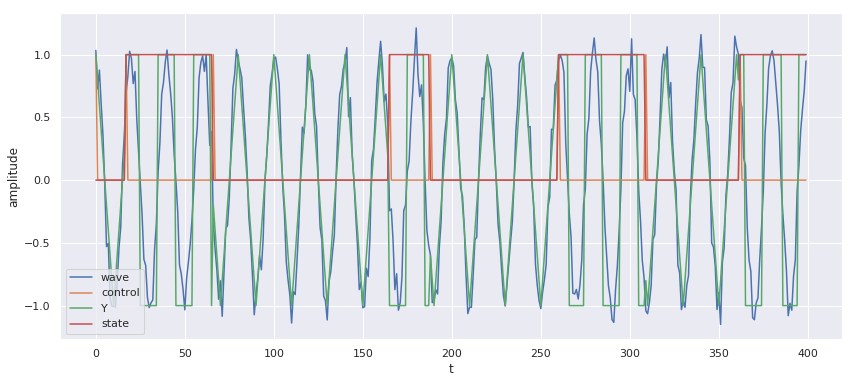

In [2]:
# For this exercise, we already provide data generation function (an 'oracle')
# which we can use
from recurrent_oracle import generate_exercise_data

# So let us generate one example time series and plot it.
# If you execute this cell multiple times you see that
# the generated data have different frequencies and have
# control signals at different points.
# The function also generates a helper time series which
# memorizes the current state (triangle = 0, square = 1)
X, Y, times, state = generate_exercise_data()

try:
    import seaborn as sns
    sns.set()
except:
    pass

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(list(times), list(X[:, 0]), list(times), list(X[:, 1]), list(times), list(Y), list(times), list(state))
plt.xlabel('t')
plt.ylabel('amplitude')
plt.legend(['wave', 'control', 'Y', 'state'])
plt.show()

### Advice

In a first step, train a network which only predicts whether we currently want a triangle wave (output zero) or a square wave (output one). The target signal for this network is the fourth output of the generate_exercise_data() function. The input should be the second column of X. You will notice that this is already surprisingly difficult and you may need some learning time to get it right.

In a second step, train _two_ networks. One which only predicts the triangle wave, and one which only predicts the square wave. Mix their outputs according to the output of the network you trained before, such that always the correct network is activated. This is then comparatively easy.

You can also try to directly learn a GRU which maps X to Y. But this should prove difficult.